In [1]:
import matplotlib.pyplot as plt 
import pandas as pd 
from sklearn.model_selection import train_test_split
import seaborn as sns
import re
from konlpy.tag import Kkma
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score
import sklearn
import pickle as pickle


/opt/conda/lib/python3.8/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.24.4
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [67]:
train_data = pd.read_csv('../data/dataset/train/train.csv')
train_dup = train_data[train_data.duplicated('sentence',keep=False)]

In [68]:
train_dup

,id,sentence,subject_entity,object_entity,label,source
6,6,그에 따라 나폴리와 계약을 연장한 마라도나는 1989년 팀을 UEFA컵 정상으로 인...,"{'word': 'AC 밀란', 'start_idx': 64, 'end_idx': ...","{'word': '1989', 'start_idx': 25, 'end_idx': 2...",no_relation,wikipedia
7,7,"박용오(朴容旿, 1937년 4월 29일(음력 3월 19일)(음력 3월 19일) ~ ...","{'word': '박용오', 'start_idx': 0, 'end_idx': 2, ...","{'word': '1937년 4월 29일', 'start_idx': 9, 'end_...",per:date_of_birth,wikipedia
9,9,"특히 김동연 전 경제부총리를 비롯한 김두관 국회의원, 안규백 국회의원, 김종민 국회...","{'word': '안규백', 'start_idx': 30, 'end_idx': 32...","{'word': '더불어민주당', 'start_idx': 100, 'end_idx'...",per:employee_of,wikitree
10,10,하비에르 파스토레는 아르헨티나 클럽 타예레스의 유소년팀에서 축구를 시작하였다.,"{'word': '하비에르 파스토레', 'start_idx': 0, 'end_idx...","{'word': '아르헨티나', 'start_idx': 11, 'end_idx': ...",per:origin,wikipedia
12,12,"2009년 9월, 미국 프로 야구 필라델피아 필리스 소속의 야구 선수 박찬호는 《M...","{'word': '필라델피아 필리스', 'start_idx': 19, 'end_id...","{'word': '박찬호', 'start_idx': 39, 'end_idx': 41...",org:top_members/employees,wikipedia
...,...,...,...,...,...,...
32451,32451,"반면 정재학의 3남인 정종원은 제5대 조흥은행장, 손자인 정운용은 제2대 조흥은행장...","{'word': '정종원', 'start_idx': 12, 'end_idx': 14...","{'word': '정재학', 'start_idx': 3, 'end_idx': 5, ...",per:parents,wikipedia
32454,32454,신라에서는 중기까지도 지배계층의 가계계승에 있어서 모계적인 경향이 그대로 존속되었고...,"{'word': '선덕여왕', 'start_idx': 101, 'end_idx': ...","{'word': '진덕여왕', 'start_idx': 95, 'end_idx': 9...",no_relation,wikipedia
32463,32463,"그의 외삼촌은 루이 13세로, 남편인 루이 14세는 외사촌 오빠가 된다.","{'word': '루이 14세', 'start_idx': 21, 'end_idx':...","{'word': '루이 13세', 'start_idx': 8, 'end_idx': ...",per:other_family,wikipedia
32465,32465,한국당은 7일 오전 9시부터 오후 5시까지 진행된 원내대표 및 정책위의장 후보자 등...,"{'word': '유기준', 'start_idx': 93, 'end_idx': 95...","{'word': '부산 서구·동구', 'start_idx': 100, 'end_id...",per:employee_of,wikitree


In [51]:
train_data.head()

,id,sentence,subject_entity,object_entity,label,source
0,0,〈Something〉는 조지 해리슨이 쓰고 비틀즈가 1969년 앨범 《Abbey R...,"{'word': '비틀즈', 'start_idx': 24, 'end_idx': 26...","{'word': '조지 해리슨', 'start_idx': 13, 'end_idx':...",no_relation,wikipedia
1,1,호남이 기반인 바른미래당·대안신당·민주평화당이 우여곡절 끝에 합당해 민생당(가칭)으...,"{'word': '민주평화당', 'start_idx': 19, 'end_idx': ...","{'word': '대안신당', 'start_idx': 14, 'end_idx': 1...",no_relation,wikitree
2,2,K리그2에서 성적 1위를 달리고 있는 광주FC는 지난 26일 한국프로축구연맹으로부터...,"{'word': '광주FC', 'start_idx': 21, 'end_idx': 2...","{'word': '한국프로축구연맹', 'start_idx': 34, 'end_idx...",org:member_of,wikitree
3,3,균일가 생활용품점 (주)아성다이소(대표 박정부)는 코로나19 바이러스로 어려움을 겪...,"{'word': '아성다이소', 'start_idx': 13, 'end_idx': ...","{'word': '박정부', 'start_idx': 22, 'end_idx': 24...",org:top_members/employees,wikitree
4,4,1967년 프로 야구 드래프트 1순위로 요미우리 자이언츠에게 입단하면서 등번호는 8...,"{'word': '요미우리 자이언츠', 'start_idx': 22, 'end_id...","{'word': '1967', 'start_idx': 0, 'end_idx': 3,...",no_relation,wikipedia


In [23]:
def find_idx(df):
    return list(train_dup[train_dup.sentence == df.sentence].index)

In [24]:
train_dup['same_idx'] = train_dup.id.apply(lambda x: find_idx(train_dup.loc[x]))

<ipython-input-24-55761b417fb5>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_dup['same_idx'] = train_dup.id.apply(lambda x: find_idx(train_dup.loc[x]))


In [106]:
def swap_arguments(start, end):
    par = train_data[train_data['label']==start]
    par_to_children = par.copy()
    par_to_children.subject_entity = par.object_entity
    par_to_children.object_entity = par.subject_entity
    par_to_children.label = end
    return par_to_children

par_to_children = swap_arguments('per:parents','per:children')
children_to_par = swap_arguments('per:parents','per:children')
sibiling = swap_arguments('per:siblings','per:siblings')
spouse = swap_arguments('per:spouse','per:spouse')
members = swap_arguments('org:members','org:member_of')

# train_data2 = pd.concat([train_data, par_to_children,children_to_par,sibiling,spouse,members])
train_data2 = pd.concat([train_data, par_to_children,children_to_par,sibiling,spouse,members])
train_data2.index = range(train_data2.shape[0])
train_data2.id = train_data2.index
train_data2.tail()

,id,sentence,subject_entity,object_entity,label,source
34856,34856,또한 “올해 내 수주를 기대하고 있는 프로젝트로는 알제리 HMD를 비롯해 말레이시아...,"{'word': 'PEMEX', 'start_idx': 166, 'end_idx':...","{'word': '멕시코', 'start_idx': 162, 'end_idx': 1...",org:member_of,wikitree
34857,34857,중세 세르비아 공국의 수도였던 스타리라스(Stari Ras)가 사라진 뒤에 설립된 ...,"{'word': '스타리라스', 'start_idx': 17, 'end_idx': ...","{'word': '중세 세르비아 공국', 'start_idx': 0, 'end_id...",org:member_of,wikipedia
34858,34858,미래통합당 비례대표용 위성정당인 미래한국당이 10일 비례대표 공천 신청자 명단을 발...,"{'word': '미래한국당', 'start_idx': 18, 'end_idx': ...","{'word': '미래통합당', 'start_idx': 0, 'end_idx': 4...",org:member_of,wikitree
34859,34859,이어 16일 스페인 바스크 자치정부의 이니고 우를클루 주지사를 만나 폐광으로 침체됐...,"{'word': '빌바오', 'start_idx': 48, 'end_idx': 50...","{'word': '바스크', 'start_idx': 11, 'end_idx': 13...",org:member_of,wikitree
34860,34860,"장 의원은 광주일고, 서울대 출신으로 행정고시를 통해 공직에 입문한 뒤 기획예산처 ...","{'word': '기획예산처', 'start_idx': 40, 'end_idx': ...","{'word': '기획재정부', 'start_idx': 157, 'end_idx':...",org:member_of,wikitree


In [90]:
train_data2.iloc[10202], train_data2.iloc[32299], train_data2.iloc[10202]

(id                                                            10202
 sentence          이날 프로그램 공개에서는 전북영산작법보존회와 김명신‧정상희의 사제동행 판소리, 관악...
 subject_entity    {'word': '강태환', 'start_idx': 62, 'end_idx': 64...
 object_entity     {'word': '색소폰', 'start_idx': 58, 'end_idx': 60...
 label                                                     per:title
 source                                                     wikitree
 Name: 10202, dtype: object,
 id                                                            32299
 sentence          배우 김병철 씨가 연기하는 정복동은 천리마마트를 망하게 하기 위해 여러 계획을 세우...
 subject_entity    {'word': '정복동', 'start_idx': 15, 'end_idx': 17...
 object_entity     {'word': '김병철', 'start_idx': 3, 'end_idx': 5, ...
 label                                           per:alternate_names
 source                                                     wikitree
 Name: 32299, dtype: object,
 id                                                            10202
 sentence          이날 프로그램 공개에서는 전북영산작법보존회와 김

In [89]:
train_data2.label.iloc[12829] ='org:top_members/employees'
train_data2.label.iloc[32299] ='per:alternate_names'
train_data2.label.iloc[22258] ='per:place_of_residence'
train_data2.label.iloc[10202] ='per:title'



<ipython-input-89-84644e8bf278>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_data2.label.iloc[12829] ='org:top_members/employees'
<ipython-input-89-84644e8bf278>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_data2.label.iloc[32299] ='per:alternate_names'
<ipython-input-89-84644e8bf278>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_data2.label.iloc[22258] ='per:place_of_residence'
<ipython-input-89-84644e8bf2

In [92]:
# train_data2[train_data2.duplicated(['sentence','subject_entity','object_entity'],keep='first')].index


Index([ 3296,  3547,  7168,  8693, 10043, 10202, 10616, 12829, 14094, 14658,
       ...
       34770, 34780, 34787, 34805, 34822, 34824, 34826, 34829, 34840, 34852],
      dtype='int64', length=932)

In [94]:
train_data2[train_data2.duplicated(['sentence','subject_entity','object_entity'],keep='last')].index

Index([   40,    77,    78,    98,   116,   239,   255,   277,   313,   384,
       ...
       32982, 32983, 32984, 32985, 32986, 32987, 32988, 32989, 33078, 33433],
      dtype='int64', length=932)

In [112]:
train_data3 = train_data2.drop(train_data2[train_data2.duplicated(['sentence','subject_entity','object_entity'],keep='last')].index)
train_data2.shape, train_data3.shape

((34861, 6), (33929, 6))

<Axes: xlabel='label'>

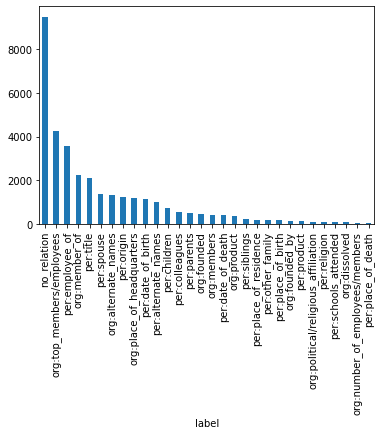

In [113]:
train_data3.label.value_counts().plot(kind='bar')

In [117]:
train_data3.index = range(train_data3.shape[0])
train_data3.id = train_data3.index

In [118]:
def whatIsWord(string):
    dic = eval(string)
    return dic['word']

train_data4 = train_data3.copy()
train_data4['object_word'] = train_data4.object_entity.apply(lambda x: whatIsWord(x))
train_data4['subject_word'] = train_data4.subject_entity.apply(lambda x: whatIsWord(x))
train_data4.head()


,id,sentence,subject_entity,object_entity,label,source,object_word,subject_word
0,0,〈Something〉는 조지 해리슨이 쓰고 비틀즈가 1969년 앨범 《Abbey R...,"{'word': '비틀즈', 'start_idx': 24, 'end_idx': 26...","{'word': '조지 해리슨', 'start_idx': 13, 'end_idx':...",no_relation,wikipedia,조지 해리슨,비틀즈
1,1,호남이 기반인 바른미래당·대안신당·민주평화당이 우여곡절 끝에 합당해 민생당(가칭)으...,"{'word': '민주평화당', 'start_idx': 19, 'end_idx': ...","{'word': '대안신당', 'start_idx': 14, 'end_idx': 1...",no_relation,wikitree,대안신당,민주평화당
2,2,K리그2에서 성적 1위를 달리고 있는 광주FC는 지난 26일 한국프로축구연맹으로부터...,"{'word': '광주FC', 'start_idx': 21, 'end_idx': 2...","{'word': '한국프로축구연맹', 'start_idx': 34, 'end_idx...",org:member_of,wikitree,한국프로축구연맹,광주FC
3,3,균일가 생활용품점 (주)아성다이소(대표 박정부)는 코로나19 바이러스로 어려움을 겪...,"{'word': '아성다이소', 'start_idx': 13, 'end_idx': ...","{'word': '박정부', 'start_idx': 22, 'end_idx': 24...",org:top_members/employees,wikitree,박정부,아성다이소
4,4,1967년 프로 야구 드래프트 1순위로 요미우리 자이언츠에게 입단하면서 등번호는 8...,"{'word': '요미우리 자이언츠', 'start_idx': 22, 'end_id...","{'word': '1967', 'start_idx': 0, 'end_idx': 3,...",no_relation,wikipedia,1967,요미우리 자이언츠


In [125]:
def bracket_cut(string,ob_word,sub_word):

    pattern = r"\([^)]+\)"
    result_sentence = re.sub(pattern, "", string)
    if result_sentence.count('(') != result_sentence.count(')'):
        return None
    if ob_word in result_sentence and sub_word in result_sentence:
        return result_sentence
    return None

def find_result(sentence, entity ,word):
    dic_sentence = eval(entity)
    start_idx = sentence.index(word)
    dic_sentence['start_idx'] =start_idx
    dic_sentence['end_idx'] =start_idx + len(word)-1
    return str(dic_sentence)

bracket_data= train_data4[(train_data4['sentence'].str.contains('\(')) & (train_data4.label != 'no_relation')]

# bracket_data.iloc[10794]

bracket_data2= bracket_data.copy()
bracket_data2.head()
bracket_data2['sentence'] = bracket_data2['id'].apply(lambda x: bracket_cut(bracket_data2['sentence'].loc[x], bracket_data2['object_word'].loc[x], bracket_data2['subject_word'].loc[x]))
bracket_data2 = bracket_data2.dropna()

bracket_data2['subject_entity'] = bracket_data2['id'].apply(lambda x: find_result(bracket_data2['sentence'].loc[x],bracket_data2['subject_entity'].loc[x],bracket_data2['subject_word'].loc[x]))
bracket_data2['object_entity'] = bracket_data2['id'].apply(lambda x: find_result(bracket_data2['sentence'].loc[x],bracket_data2['object_entity'].loc[x],bracket_data2['object_word'].loc[x]))
bracket_data2=bracket_data2[train_data3.columns]

bracket_data2

,id,sentence,subject_entity,object_entity,label,source
11,11,이른바 'Z세대'로 불리는 1990년대 중반 이후 태어난 세대에게 대표 아이콘으로 ...,"{'word': '빌리 아일리시', 'start_idx': 60, 'end_idx'...","{'word': '싱어송라이터', 'start_idx': 53, 'end_idx':...",per:title,wikitree
66,66,"1984년에는 포스트시즌을 포함해 56경기 324.2이닝, 31승, 6세이브, 18...","{'word': '롯데 자이언츠', 'start_idx': 95, 'end_idx'...","{'word': '1984년', 'start_idx': 0, 'end_idx': 4...",org:founded,wikipedia
74,74,더군다나 이날 경기에는 잔니 인판티노 국제축구연맹 회장까지 관전했지만 북한은 '무관...,"{'word': '국제축구연맹', 'start_idx': 21, 'end_idx':...","{'word': '잔니 인판티노', 'start_idx': 13, 'end_idx'...",org:top_members/employees,wikitree
75,75,"1727년, 옹정제는 자신의 심복이자 과거 사천 순무로 그 곳 사정을 잘 알던 연갱...","{'word': '연갱요', 'start_idx': 44, 'end_idx': 46...","{'word': '무원대장군', 'start_idx': 49, 'end_idx': ...",per:title,wikipedia
81,81,《천녀유혼》은 1987년 개봉한 홍콩의 로맨틱 코미디 호러 영화로 제작자는 서극이며...,"{'word': '정소동', 'start_idx': 54, 'end_idx': 56...","{'word': '영화감독', 'start_idx': 48, 'end_idx': 5...",per:title,wikipedia
...,...,...,...,...,...,...
33917,33917,"마크 피터 위드마이어는 미국의 야구 코치이자 스카우트로, 현재 KBO 리그 KIA ...","{'word': 'KIA 타이거즈', 'start_idx': 42, 'end_idx...","{'word': 'KBO 리그', 'start_idx': 35, 'end_idx':...",org:member_of,wikipedia
33918,33918,스포츠의 애호가로 알려진 그는 1912년 스톡홀름 올림픽을 개최하고 1897년부터...,"{'word': '스톡홀름', 'start_idx': 24, 'end_idx': 2...","{'word': '스웨덴', 'start_idx': 55, 'end_idx': 57...",org:member_of,wikipedia
33922,33922,"강혁 전 KBO 리그 두산 베어스, SK 와이번스의 선수이다.","{'word': '두산 베어스', 'start_idx': 12, 'end_idx':...","{'word': 'KBO 리그', 'start_idx': 5, 'end_idx': ...",org:member_of,wikipedia
33924,33924,또한 “올해 내 수주를 기대하고 있는 프로젝트로는 알제리 HMD를 비롯해 말레이시아...,"{'word': 'PEMEX', 'start_idx': 116, 'end_idx':...","{'word': '멕시코', 'start_idx': 112, 'end_idx': 1...",org:member_of,wikitree


In [127]:
train_data5 = pd.concat([train_data3, bracket_data2])
train_data5.index = range(train_data5.shape[0])
train_data5.id = train_data5.index
train_data5

,id,sentence,subject_entity,object_entity,label,source
0,0,〈Something〉는 조지 해리슨이 쓰고 비틀즈가 1969년 앨범 《Abbey R...,"{'word': '비틀즈', 'start_idx': 24, 'end_idx': 26...","{'word': '조지 해리슨', 'start_idx': 13, 'end_idx':...",no_relation,wikipedia
1,1,호남이 기반인 바른미래당·대안신당·민주평화당이 우여곡절 끝에 합당해 민생당(가칭)으...,"{'word': '민주평화당', 'start_idx': 19, 'end_idx': ...","{'word': '대안신당', 'start_idx': 14, 'end_idx': 1...",no_relation,wikitree
2,2,K리그2에서 성적 1위를 달리고 있는 광주FC는 지난 26일 한국프로축구연맹으로부터...,"{'word': '광주FC', 'start_idx': 21, 'end_idx': 2...","{'word': '한국프로축구연맹', 'start_idx': 34, 'end_idx...",org:member_of,wikitree
3,3,균일가 생활용품점 (주)아성다이소(대표 박정부)는 코로나19 바이러스로 어려움을 겪...,"{'word': '아성다이소', 'start_idx': 13, 'end_idx': ...","{'word': '박정부', 'start_idx': 22, 'end_idx': 24...",org:top_members/employees,wikitree
4,4,1967년 프로 야구 드래프트 1순위로 요미우리 자이언츠에게 입단하면서 등번호는 8...,"{'word': '요미우리 자이언츠', 'start_idx': 22, 'end_id...","{'word': '1967', 'start_idx': 0, 'end_idx': 3,...",no_relation,wikipedia
...,...,...,...,...,...,...
38830,38830,"마크 피터 위드마이어는 미국의 야구 코치이자 스카우트로, 현재 KBO 리그 KIA ...","{'word': 'KIA 타이거즈', 'start_idx': 42, 'end_idx...","{'word': 'KBO 리그', 'start_idx': 35, 'end_idx':...",org:member_of,wikipedia
38831,38831,스포츠의 애호가로 알려진 그는 1912년 스톡홀름 올림픽을 개최하고 1897년부터...,"{'word': '스톡홀름', 'start_idx': 24, 'end_idx': 2...","{'word': '스웨덴', 'start_idx': 55, 'end_idx': 57...",org:member_of,wikipedia
38832,38832,"강혁 전 KBO 리그 두산 베어스, SK 와이번스의 선수이다.","{'word': '두산 베어스', 'start_idx': 12, 'end_idx':...","{'word': 'KBO 리그', 'start_idx': 5, 'end_idx': ...",org:member_of,wikipedia
38833,38833,또한 “올해 내 수주를 기대하고 있는 프로젝트로는 알제리 HMD를 비롯해 말레이시아...,"{'word': 'PEMEX', 'start_idx': 116, 'end_idx':...","{'word': '멕시코', 'start_idx': 112, 'end_idx': 1...",org:member_of,wikitree


In [130]:
train_data5[train_data5.label != 'no_relation'].label.value_counts()

label
org:top_members/employees              4783
per:employee_of                        4291
org:member_of                          2820
per:title                              2667
per:spouse                             1674
per:origin                             1663
org:place_of_headquarters              1532
org:alternate_names                    1502
per:date_of_birth                      1153
per:alternate_names                    1102
per:children                            947
per:parents                             664
per:colleagues                          605
org:founded                             571
org:members                             524
org:product                             477
per:date_of_death                       451
per:siblings                            304
per:place_of_residence                  248
per:other_family                        235
per:place_of_birth                      211
org:founded_by                          201
per:product               

In [132]:
train_data5.to_csv('../data/dataset/train/train_arg_total.csv')

In [137]:
def whatType(string):
    dic = eval(string)
    return dic['type']
def whatIsWord(string):
    dic = eval(string)
    return dic['word']
def when_start(ob_entity,sub_entity):
    ob_idx = eval(ob_entity)['start_idx']
    sub_idx = eval(sub_entity)['start_idx']
    if ob_idx >sub_idx:
        return 0
    return 1

In [138]:
train_data6=train_data5.copy()
train_data6['object_type'] = train_data6.object_entity.apply(lambda x: whatType(x))
train_data6['subject_type'] = train_data6.subject_entity.apply(lambda x: whatType(x))
train_data6['fast']= train_data6.id.apply(lambda x: when_start(train_data6['object_entity'].loc[x],train_data6['subject_entity'].loc[x]))



In [147]:
train_ = train_data6.drop(train_data6[train_data6['label']=='no_relation'].groupby(['subject_type','object_type','fast']).sample(frac=0.5, random_state=42).index)
dev_ =train_.groupby('label').sample(n=20,random_state=42)
train_2 = train_.drop(dev_.index)
train_2 = train_2.sample(frac=1,random_state=42)
train_2.shape,dev_.shape

((33486, 9), (600, 9))

In [148]:
train_2.to_csv('../data/dataset/train/train_total.csv')
dev_.to_csv('../data/dataset/train/dev_total.csv')

In [162]:
train_2.shape

(33486, 9)

In [169]:
train_3=train_2.copy()
x=train_3.label.value_counts()
for label in x[x<170].index:
    train_3 = pd.concat([train_3,train_3[train_3.label == label]])
    train_3 = pd.concat([train_3,train_3[train_3.label == label]])
for label in x[(x>170) & (x<300)].index:
    train_3 = pd.concat([train_3,train_3[train_3.label == label]])
train_3.sample(frac=1,random_state=42)
train_3.index = range(train_3.shape[0])
train_3.id = train_3.index
train_3.tail()
train_3.to_csv('../data/dataset/train/train_totalX3.csv')


In [155]:
x

label
org:top_members/employees              4763
no_relation                            4722
per:employee_of                        4271
org:member_of                          2800
per:title                              2647
per:spouse                             1654
per:origin                             1643
org:place_of_headquarters              1512
org:alternate_names                    1482
per:date_of_birth                      1133
per:alternate_names                    1082
per:children                            927
per:parents                             644
per:colleagues                          585
org:founded                             551
org:members                             504
org:product                             457
per:date_of_death                       431
per:siblings                            284
per:place_of_residence                  228
per:other_family                        215
per:place_of_birth                      191
org:founded_by            

In [156]:

x[x<170],x[x<170].shape

(label
 per:product                            158
 org:political/religious_affiliation    114
 per:religion                           107
 per:schools_attended                    79
 org:dissolved                           55
 org:number_of_employees/members         38
 per:place_of_death                      28
 Name: count, dtype: int64,
 (7,))

In [142]:
train_.label.value_counts()

label
org:top_members/employees              4783
no_relation                            4742
per:employee_of                        4291
org:member_of                          2820
per:title                              2667
per:spouse                             1674
per:origin                             1663
org:place_of_headquarters              1532
org:alternate_names                    1502
per:date_of_birth                      1153
per:alternate_names                    1102
per:children                            947
per:parents                             664
per:colleagues                          605
org:founded                             571
org:members                             524
org:product                             477
per:date_of_death                       451
per:siblings                            304
per:place_of_residence                  248
per:other_family                        235
per:place_of_birth                      211
org:founded_by            

<Axes: xlabel='label'>

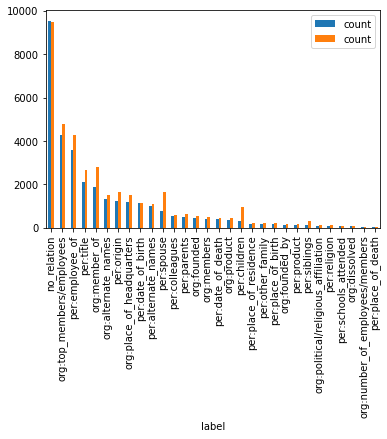

In [136]:
x= pd.concat([train_data.label.value_counts(),train_data5.label.value_counts()],axis=1)
x.plot(kind='bar')


<Axes: xlabel='label'>

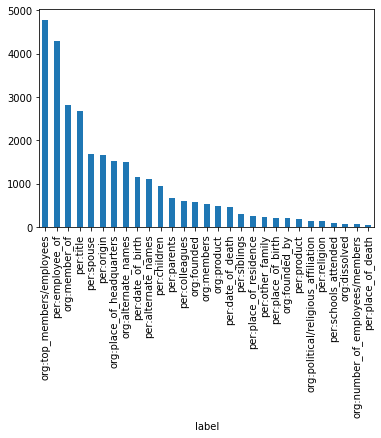

In [131]:
train_data5[train_data5.label != 'no_relation'].label.value_counts().plot(kind='bar')


In [97]:
train_data3.to_csv('../data/dataset/train/train_clinic_arg.csv')

In [82]:
x=train_data2.loc[train_data2[train_data2.duplicated(['sentence','subject_entity','object_entity'],keep='last')].index]
x[x['label']=='no_relation'].shape


(43, 6)

In [74]:
par_to_children.loc[27806]

id                                                            27806
sentence          조선 세종 28년(1446) 소헌왕후 심씨가 죽자 세종은 그의 명복을 빌기 위해 아...
subject_entity    {'word': '소헌왕후', 'start_idx': 16, 'end_idx': 1...
object_entity     {'word': '수양대군', 'start_idx': 49, 'end_idx': 5...
label                                                  per:children
source                                                    wikipedia
Name: 27806, dtype: object

In [75]:
children_to_par.loc[27806]

id                                                            27806
sentence          조선 세종 28년(1446) 소헌왕후 심씨가 죽자 세종은 그의 명복을 빌기 위해 아...
subject_entity    {'word': '소헌왕후', 'start_idx': 16, 'end_idx': 1...
object_entity     {'word': '수양대군', 'start_idx': 49, 'end_idx': 5...
label                                                  per:children
source                                                    wikipedia
Name: 27806, dtype: object

In [73]:
train_data2[train_data2['id']==27806]

,id,sentence,subject_entity,object_entity,label,source
27806,27806,조선 세종 28년(1446) 소헌왕후 심씨가 죽자 세종은 그의 명복을 빌기 위해 아...,"{'word': '수양대군', 'start_idx': 49, 'end_idx': 5...","{'word': '소헌왕후', 'start_idx': 16, 'end_idx': 1...",per:parents,wikipedia
32913,27806,조선 세종 28년(1446) 소헌왕후 심씨가 죽자 세종은 그의 명복을 빌기 위해 아...,"{'word': '소헌왕후', 'start_idx': 16, 'end_idx': 1...","{'word': '수양대군', 'start_idx': 49, 'end_idx': 5...",per:children,wikipedia
33433,27806,조선 세종 28년(1446) 소헌왕후 심씨가 죽자 세종은 그의 명복을 빌기 위해 아...,"{'word': '소헌왕후', 'start_idx': 16, 'end_idx': 1...","{'word': '수양대군', 'start_idx': 49, 'end_idx': 5...",per:children,wikipedia


In [65]:
train_data2[train_data2.duplicated(['sentence','subject_entity','object_entity'],keep='first')].index


Index([ 3296,  3547,  7168,  8693, 10043, 10202, 10616, 12829, 14094, 14658,
       ...
       26360, 26864, 27209, 28633, 30084, 30202, 30344, 30580, 31309, 32214],
      dtype='int64', length=932)

In [54]:
train_data2[train_data2.duplicated(['sentence','subject_entity','object_entity'])]

,id,sentence,subject_entity,object_entity,label,source
3296,3296,"이날 프로그램 공개에서는 전북영산작법보존회와 김명신‧정상희의 사제동행 판소리, 관악...","{'word': '강태환', 'start_idx': 62, 'end_idx': 64...","{'word': '색소폰', 'start_idx': 58, 'end_idx': 60...",per:title,wikitree
3547,3547,2010년 10월 15일 전라북도청을 방문한 맹형규 행정안전부 장관은 도내 지자체간...,"{'word': '전라북도청', 'start_idx': 14, 'end_idx': ...","{'word': '행정안전부', 'start_idx': 29, 'end_idx': ...",no_relation,wikipedia
7168,7168,"특히, KRI 한국기록원으로부터 2년 연속 공인중개사 최다 합격자 배출 기록을 공식...","{'word': '한국기록원', 'start_idx': 8, 'end_idx': 1...","{'word': 'KRI', 'start_idx': 4, 'end_idx': 6, ...",org:alternate_names,wikitree
8693,8693,김영삼 전 대통령은 2012년 7월 11일 김문수 새누리당 대선 경선후보의 예방에 ...,"{'word': '김문수', 'start_idx': 24, 'end_idx': 26...","{'word': '박근혜', 'start_idx': 47, 'end_idx': 49...",no_relation,wikipedia
10043,10043,특히 신분변화를 담고 있는데 1차 시도는 김영삼 정부 시절 해양수산부 장관이 각 지...,"{'word': '해운항만청', 'start_idx': 47, 'end_idx': ...","{'word': '해양수산부', 'start_idx': 33, 'end_idx': ...",org:member_of,wikipedia
...,...,...,...,...,...,...
30202,30202,비록 ICOMOS의 권고 시점에서 기준(4)의 적용은 부정되었고 세계문화유산 위원회...,"{'word': '히라이즈미', 'start_idx': 69, 'end_idx': ...","{'word': '문화유산', 'start_idx': 38, 'end_idx': 4...",org:member_of,wikipedia
30344,30344,"2010년 9월 2일, 신한은행이 신상훈 신한금융그룹 사장을 의해 횡령, 배임의 혐...","{'word': '신한은행', 'start_idx': 13, 'end_idx': 1...","{'word': '신한금융그룹', 'start_idx': 23, 'end_idx':...",org:member_of,wikipedia
30580,30580,김은갑 IBK투자증권 연구원은 “JB금융지주의 지난해 연결기준 순이익은 전년 대비 ...,"{'word': '광주은행', 'start_idx': 80, 'end_idx': 8...","{'word': 'JB금융지주', 'start_idx': 18, 'end_idx':...",org:member_of,wikitree
31309,31309,기독당(基督黨)은 기독사랑실천당 출신의 박두식 목사가 창당한 대한민국의 기독교 정당이다.,"{'word': '기독당', 'start_idx': 0, 'end_idx': 2, ...","{'word': '기독사랑실천당', 'start_idx': 10, 'end_idx'...",org:member_of,wikipedia


In [48]:

train_data[train_data['label']=='org:member_of']

,id,sentence,subject_entity,object_entity,label,source
2,2,K리그2에서 성적 1위를 달리고 있는 광주FC는 지난 26일 한국프로축구연맹으로부터...,"{'word': '광주FC', 'start_idx': 21, 'end_idx': 2...","{'word': '한국프로축구연맹', 'start_idx': 34, 'end_idx...",org:member_of,wikitree
17,17,제2총군은 태평양 전쟁 말기에 일본 본토에 상륙하려는 연합군에게 대항하기 위해 설립...,"{'word': '제2총군', 'start_idx': 0, 'end_idx': 3,...","{'word': '일본 제국 육군', 'start_idx': 48, 'end_idx...",org:member_of,wikipedia
23,23,스포츠계에서도 막강한 영향력을 펼치고 있어 2008년 9월 만수르 빈 자이드 알나하...,"{'word': '맨체스터 시티 FC', 'start_idx': 96, 'end_i...","{'word': '프리미어리그', 'start_idx': 88, 'end_idx':...",org:member_of,wikipedia
42,42,"2008-09 시즌, 그는 페페의 10경기 출장 정지 징계로부터 수혜를 받은 선수로...","{'word': '세비야', 'start_idx': 56, 'end_idx': 58...","{'word': '스페인', 'start_idx': 119, 'end_idx': 1...",org:member_of,wikipedia
43,43,대한민국에서는 2008년 대원미디어㈜에서 수입하여 자사인 대원방송㈜에서 더빙 작업을...,"{'word': '대원방송', 'start_idx': 32, 'end_idx': 3...","{'word': '대원미디어', 'start_idx': 14, 'end_idx': ...",org:member_of,wikipedia
...,...,...,...,...,...,...
32417,32417,강원도 평창군은 오는 28일부터 내년 2월 2일까지 평창군 진부면 오대천 일원에서 ...,"{'word': '평창군', 'start_idx': 4, 'end_idx': 6, ...","{'word': '강원도', 'start_idx': 0, 'end_idx': 2, ...",org:member_of,wikitree
32419,32419,미국프로농구(NBA) 경기 도중 난투극을 벌인 조엘 엠비드(필라델피아 세븐티식서스)...,"{'word': '필라델피아 세븐티식서스', 'start_idx': 33, 'end...","{'word': 'NBA', 'start_idx': 7, 'end_idx': 9, ...",org:member_of,wikitree
32428,32428,"이번 프로모션은 파리바게뜨, 던킨도너츠, 배스킨라빈스, 파스쿠찌 등 SPC그룹의 주...","{'word': '파스쿠찌', 'start_idx': 31, 'end_idx': 3...","{'word': 'SPC그룹', 'start_idx': 38, 'end_idx': ...",org:member_of,wikitree
32444,32444,"10월 28일에 은퇴 관련 기자회견을 하였으며, 11월 1일 전주에서 열린 대구 F...","{'word': '대구 FC', 'start_idx': 42, 'end_idx': ...","{'word': 'K리그1', 'start_idx': 50, 'end_idx': 5...",org:member_of,wikipedia


In [49]:
train_data[train_data['label']=='org:place_of_headquarters']

,id,sentence,subject_entity,object_entity,label,source
8,8,중공군에게 온전히 대항할 수 없을 정도로 약해진 국민당은 타이베이로 수도를 옮기는 ...,"{'word': '중화민국', 'start_idx': 59, 'end_idx': 6...","{'word': '타이베이', 'start_idx': 32, 'end_idx': 3...",org:place_of_headquarters,wikipedia
85,85,강진 아르코공연연습센터는 전라남도 강진군 대구면 저두리 66번지에 위치해 있으며 단...,"{'word': '강진군', 'start_idx': 74, 'end_idx': 76...","{'word': '전라남도', 'start_idx': 88, 'end_idx': 9...",org:place_of_headquarters,wikipedia
129,129,2007년 5월 30일 조선중앙통신사는 조선민주주의인민공화국의 국가인 애국가가 재편...,"{'word': '조선중앙통신사', 'start_idx': 13, 'end_idx'...","{'word': '조선민주주의인민공화국', 'start_idx': 22, 'end_...",org:place_of_headquarters,wikipedia
132,132,1972년 테헤란 대학교(법학)을 졸업한 뒤 영국 스코틀랜드의 글래스고 칼레도니언 ...,"{'word': '글래스고', 'start_idx': 35, 'end_idx': 3...","{'word': '스코틀랜드', 'start_idx': 28, 'end_idx': ...",org:place_of_headquarters,wikipedia
134,134,"1726년 상인의 아들로 스코틀랜드 에든버러에서 태어나, 에든버러 대학교에서 법률을...","{'word': '에든버러 대학교', 'start_idx': 32, 'end_idx...","{'word': '스코틀랜드 에든버러', 'start_idx': 14, 'end_i...",org:place_of_headquarters,wikipedia
...,...,...,...,...,...,...
32348,32348,경남대학교 LINC사업단(단장 강재관)은 5일 대전 컨벤션 센터에서 개최된 ‘제2회...,"{'word': '경남대학교', 'start_idx': 0, 'end_idx': 4...","{'word': '대한민국', 'start_idx': 47, 'end_idx': 5...",org:place_of_headquarters,wikitree
32362,32362,1961년 스위스의 종합 식품회사 네슬레에서 우유 성분을 첨가하지 않고 완전히 식물...,"{'word': '네슬레', 'start_idx': 19, 'end_idx': 21...","{'word': '스위스', 'start_idx': 6, 'end_idx': 8, ...",org:place_of_headquarters,wikipedia
32369,32369,이후 33인 중 유일하게 체포되지 않고 상하이로 망명을 떠나 대한민국 임시정부에 합...,"{'word': '대한민국 임시정부', 'start_idx': 34, 'end_id...","{'word': '상하이', 'start_idx': 22, 'end_idx': 24...",org:place_of_headquarters,wikipedia
32410,32410,"1765년 네덜란드의 레이던 대학교로 유학하였고, 퍼햄 남작 휴 윌로비의 도움으로 ...","{'word': '레이던 대학교', 'start_idx': 12, 'end_idx'...","{'word': '네덜란드', 'start_idx': 6, 'end_idx': 9,...",org:place_of_headquarters,wikipedia


In [43]:
train_data[train_data['label']=='per:siblings'].shape


(136, 6)

In [36]:
train_data[train_data['label']=='per:sibling']

,id,sentence,subject_entity,object_entity,label,source


In [28]:
par = train_dup[train_dup['label']=='per:parents']


,id,sentence,subject_entity,object_entity,label,source,same_idx
146,146,후지와라노 쇼시/다마코(1101년 - 1145년 9월 10일)은 헤이안 시대 도바 ...,"{'word': '다카쿠라 천황', 'start_idx': 85, 'end_idx'...","{'word': '고시라카와 천황', 'start_idx': 64, 'end_idx...",per:parents,wikipedia,"[146, 19315]"
219,219,김대중은 1924년 1월 6일에 전라남도 신안에서 아버지 김운식과 어머니 장수금 사...,"{'word': '김대중', 'start_idx': 0, 'end_idx': 2, ...","{'word': '어머니 장수금', 'start_idx': 37, 'end_idx'...",per:parents,wikipedia,"[219, 9503]"
229,229,자의왕후는 문무왕과의 사이에서 소명태자와 훗날 신문왕이 되는 정명태자를 낳았다.,"{'word': '신문왕', 'start_idx': 26, 'end_idx': 28...","{'word': '문무왕', 'start_idx': 6, 'end_idx': 8, ...",per:parents,wikipedia,"[121, 229, 5450]"
813,813,노르웨이 왕 호콘 6세의 왕비 마르그레테 1세는 그녀의 부왕인 발데마르 4세와 그녀...,"{'word': '마르그레테 1세', 'start_idx': 17, 'end_idx...","{'word': '발데마르 4세', 'start_idx': 35, 'end_idx'...",per:parents,wikipedia,"[813, 2014]"
866,866,"서울특별시 마포구 신공덕동에 있던 마을로서, 지금은 효창공원이 된 정조의 맏아들 문...","{'word': '문효세자', 'start_idx': 45, 'end_idx': 4...","{'word': '의빈 성씨', 'start_idx': 58, 'end_idx': ...",per:parents,wikipedia,"[866, 32030]"
...,...,...,...,...,...,...,...
31258,31258,《삼국사기》에서 아버지로 지목하는 구수왕과 형으로 지목한 사반왕이 죽은 뒤 70년만...,"{'word': '사반왕', 'start_idx': 32, 'end_idx': 34...","{'word': '구수왕', 'start_idx': 19, 'end_idx': 21...",per:parents,wikipedia,"[18234, 31258]"
31446,31446,"따라서 의회는 찰스 1세의 아들 찰스 2세에게 왕권을 반환했고, 1660년에 스튜어...","{'word': '찰스 2세', 'start_idx': 18, 'end_idx': ...","{'word': '찰스 1세', 'start_idx': 8, 'end_idx': 1...",per:parents,wikipedia,"[24223, 31446]"
31807,31807,우선 《일본서기》에 수록된 덴지 천황의 즉위 당시 16세라는 연령은 실은 그 아버지...,"{'word': '덴무 천황', 'start_idx': 114, 'end_idx':...","{'word': '조메이 천황', 'start_idx': 47, 'end_idx':...",per:parents,wikipedia,"[23588, 31807]"
32202,32202,1714년 루이 14세가 죽고 난 뒤에는 프랑수아즈도 궁에서 물러났고 어린 루이 1...,"{'word': '루이 15세', 'start_idx': 42, 'end_idx':...","{'word': '루이 14세', 'start_idx': 6, 'end_idx': ...",per:parents,wikipedia,"[24684, 32202]"


In [40]:
train_data[train_data['label']=='per:alternate_names'].shape

(1001, 6)

In [41]:
train_data[train_data['label']=='org:alternate_names'].shape


(1320, 6)

In [29]:
dup_ids = [] 
for i in train_dup.same_idx:
    li=[]
    for num,idx in enumerate(i):
        if num ==0:
            x= train_dup.loc[idx].object_entity
            continue
        y= train_dup.loc[idx].subject_entity



[6, 3125]
[7, 11253]
[9, 4742]
[10, 6454]
[12, 15511]
[14, 7700]
[15, 12984, 16371]
[16, 30482]
[17, 21103]
[18, 24954]
[30, 3402]
[40, 19588]
[43, 29317]
[46, 17773]
[52, 1388]
[56, 1648]
[57, 16610]
[64, 4615, 28815]
[71, 12375]
[73, 612, 31635]
[75, 23145]
[77, 26133]
[78, 27511]
[79, 1634]
[80, 12841]
[82, 3453]
[88, 20374]
[98, 7374]
[101, 12907]
[105, 8471]
[111, 2045, 18141]
[112, 2943, 27632]
[113, 14108]
[116, 30676]
[121, 229, 5450]
[134, 10015]
[137, 10279]
[141, 32013]
[146, 19315]
[150, 29182]
[151, 32435]
[164, 8858]
[168, 25001]
[176, 8477]
[177, 12739]
[179, 22598]
[183, 29139]
[185, 14235]
[188, 17930]
[189, 31212]
[191, 2684]
[208, 13355]
[219, 9503]
[227, 12256]
[121, 229, 5450]
[235, 27925]
[239, 1432]
[240, 5916]
[248, 830, 18959]
[251, 30206]
[255, 3547]
[260, 4424]
[265, 16419]
[277, 3296, 10202]
[288, 17548]
[290, 14957]
[294, 31071]
[300, 28490]
[311, 17457]
[313, 7795]
[319, 23323]
[328, 25713]
[331, 22389]
[333, 24394]
[351, 5389]
[355, 8806]
[356, 25757]
[35